In [24]:
from pyprojroot import here
root = here()
import sys
sys.path.append(str(root))

In [25]:
from recipe_dataset.utils.full_run_utils import select_last_file

In [26]:
import pandas as pd
import numpy as np

In [27]:
ingredients_df = pd.read_feather(f'{root}/../data/local/recipe/partial/ingredients/0.feather')
expanded_ingredients_df = pd.read_feather(f'{root}/../data/local/recipe/partial/expanded_ingredients/0.feather', dtype_backend='pyarrow')

ingredients_df.shape, expanded_ingredients_df.shape

((2450, 10), (2450, 21))

# Testing Salt

Salt is a good test ingredient here, as most recipes should have around 2% salt. 

In [28]:
food_df = pd.read_feather(select_last_file(f'{root}/../data/local/molecule/full/food'))
food_ids = pd.read_feather(select_last_file(f'{root}/../data/local/molecule/full/food_ids'), dtype_backend='pyarrow')
food_weights = pd.read_feather(select_last_file(f'{root}/../data/local/density/full/weights'), dtype_backend='pyarrow')
foods = food_ids.join(food_weights, how='inner')

In [29]:
food_df.index[food_df['name']=='salt'][0]

804

In [30]:
foods[(foods['food_id'] == food_df.index[food_df['name']=='salt'][0]) & (foods['weight_ratio'] > 0.05)].__len__() / foods[(foods['food_id'] == food_df.index[food_df['name']=='salt'][0])].__len__()

0.5093431369529005

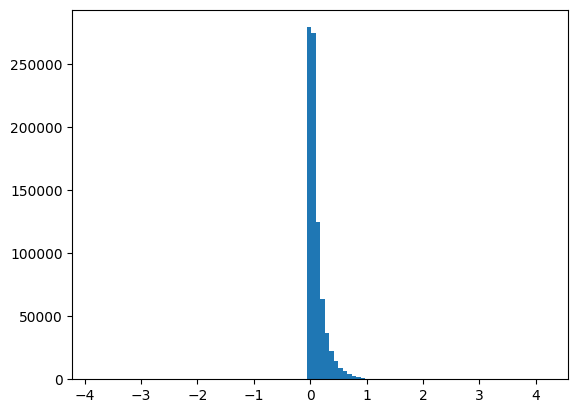

In [31]:
import matplotlib.pyplot as plt
plt.hist(foods['weight_ratio'][(foods['food_id'] == food_df.index[food_df['name']=='salt'][0])], bins=100);

50% of recipes have over 5% salt, which should definitely not be the case. 

## Investigating

In [32]:
ingredients_df = pd.read_feather(f'{root}/../data/local/recipe/partial/ingredients/0.feather')

In [33]:
salt_ing = ingredients_df[ingredients_df['name.name'] == 'salt']
salt_ing

name.name name.description  quantity       unit comment  \
recipe  ingredient                                                           
53081   5               salt             salt       0.5       tsps    <NA>   
1533767 4               salt             salt       0.5  teaspoons    <NA>   
        14              salt             salt       0.5  teaspoons    <NA>   
782330  6               salt             salt       0.5       tsps    <NA>   
1820100 9               salt             salt      12.0  teaspoons    <NA>   
...                      ...              ...       ...        ...     ...   
1747790 7               salt             salt      0.25  teaspoons    <NA>   
96825   8               salt             salt       1.0        tsp    <NA>   
1097688 6               salt             salt      0.75  teaspoons    <NA>   
1401651 2               salt         sea salt       1.0   teaspoon    <NA>   
599284  5               salt             salt       0.5       tsps    <NA>   

                   preparation    ingredient_string   unit_tags  \
recipe  ingredient                                                
53081   5                 <NA>        1/2 tsp. salt  [teaspoon]   
1533767 4                 <NA>    1/2 teaspoon salt  [teaspoon]   
        14                <NA>    1/2 teaspoon salt  [teaspoon]   
782330  6                 <NA>        1/2 tsp. salt  [teaspoon]   
1820100 9                 <NA>     12 teaspoon salt  [teaspoon]   
...                        ...                  ...         ...   
1747790 7                 <NA>    1/4 teaspoon salt  [teaspoon]   
96825   8                 <NA>          1 tsp. salt  [teaspoon]   
1097688 6                 <NA>    3/4 teaspoon salt  [teaspoon]   
1401651 2                 <NA>  1 teaspoon sea salt  [teaspoon]   
599284  5                 <NA>        1/2 tsp. salt  [teaspoon]   

                   unit_remainders unit_type  
recipe  ingredient                            
53081   5                       []    volume  
1533767 4                       []    volume  
        14                      []    volume  
782330  6                       []    volume  
1820100 9                       []    volume  
...                            ...       ...  
1747790 7                       []    volume  
96825   8                       []    volume  
1097688 6                       []    volume  
1401651 2                       []    volume  
599284  5                       []    volume  

[91 rows x 10 columns]

In [34]:
ingredient_weights = pd.read_feather(f'{root}/../data/local/density/partial/weights/0.feather')
salt_wr = ingredient_weights.loc[ingredients_df.index[ingredients_df['name.name'] == 'salt']]
salt_wr

weight_ratio
recipe  ingredient              
53081   5               0.003073
1533767 4               0.001717
        14              0.001717
782330  6               0.001489
1820100 9               0.010613
...                          ...
1747790 7               0.002245
96825   8               0.006257
1097688 6               0.002477
1401651 2               0.077922
599284  5               0.001936

[91 rows x 1 columns]

In [35]:
salt_wr[salt_wr['weight_ratio'] > 0.05]

,,weight_ratio
recipe,ingredient,
520540,4,0.08158
1883505,7,0.072758
2049700,3,0.170765
402239,7,0.090909
1020744,7,0.050353
1401651,2,0.077922


In [36]:
ingredients_df.loc[salt_wr[salt_wr['weight_ratio'] > 0.05].index]

,,name.name,name.description,quantity,unit,comment,preparation,ingredient_string,unit_tags,unit_remainders,unit_type
recipe,ingredient,,,,,,,,,,
520540,4,salt,salt,1.5,tsps,<NA>,<NA>,1 1/2 tsp. salt,[teaspoon],[],volume
1883505,7,salt,salt pepper,1.0,dash,<NA>,<NA>,1 dash Salt and pepper,[dash],[],volume
2049700,3,salt,salt reduced ham,50.0,g,<NA>,fat free shredded,"50g salt reduced, fat free shredded ham",[gram],[],weight
402239,7,salt,salt,<NA>,pinch,<NA>,<NA>,pinch salt,[pinch],[],volume
1020744,7,salt,salt,1.0,pinch,<NA>,<NA>,1 pinch salt,[pinch],[],volume
1401651,2,salt,sea salt,1.0,teaspoon,<NA>,<NA>,1 teaspoon sea salt,[teaspoon],[],volume


In [37]:
salt_ing[salt_ing['unit_type'] == 'portion']

name.name name.description  quantity  unit comment  \
recipe  ingredient                                                      
1847919 5               salt         sea salt       1.0  <NA>    <NA>   
1873817 4               salt             salt       1.0  <NA>    <NA>   
2076879 1               salt      salt pepper       1.0  <NA>    <NA>   
        7               salt             salt       1.0  <NA>    <NA>   
2158575 2               salt   salt pork "wid       1.0  <NA>    <NA>   

                   preparation                ingredient_string unit_tags  \
recipe  ingredient                                                          
1847919 5                 <NA>          1 12 teaspoons sea salt        []   
1873817 4                 <NA>              1 12 teaspoons salt        []   
2076879 1                 <NA>                1 Salt and pepper        []   
        7                 <NA>                           1 Salt        []   
2158575 2                 <NA>  1 x Salt pork -- about 1/2" wid        []   

                   unit_remainders unit_type  
recipe  ingredient                            
1847919 5                       []   portion  
1873817 4                       []   portion  
2076879 1                       []   portion  
        7                       []   portion  
2158575 2                       []   portion

In [38]:
portion_ids = pd.read_feather(f'{root}/../data/local/density/partial/food_portion_ids/0.feather')
food_ids = pd.read_feather(f'{root}/../data/local/density/partial/food_ids/0.feather')
food_portion_df = pd.read_feather(f'{root}/../data/local/density/full/food_portion/0.feather')
density_food_df = pd.read_feather(f'{root}/../data/local/density/full/food/0.feather')

In [39]:
ingredients_df.loc[salt_wr[salt_wr['weight_ratio'] > 0.05].index]

,,name.name,name.description,quantity,unit,comment,preparation,ingredient_string,unit_tags,unit_remainders,unit_type
recipe,ingredient,,,,,,,,,,
520540,4,salt,salt,1.5,tsps,<NA>,<NA>,1 1/2 tsp. salt,[teaspoon],[],volume
1883505,7,salt,salt pepper,1.0,dash,<NA>,<NA>,1 dash Salt and pepper,[dash],[],volume
2049700,3,salt,salt reduced ham,50.0,g,<NA>,fat free shredded,"50g salt reduced, fat free shredded ham",[gram],[],weight
402239,7,salt,salt,<NA>,pinch,<NA>,<NA>,pinch salt,[pinch],[],volume
1020744,7,salt,salt,1.0,pinch,<NA>,<NA>,1 pinch salt,[pinch],[],volume
1401651,2,salt,sea salt,1.0,teaspoon,<NA>,<NA>,1 teaspoon sea salt,[teaspoon],[],volume


In [40]:
portion_ids.loc[salt_wr[salt_wr['weight_ratio'] > 0.05].index]

,,food_portion_id
recipe,ingredient,
520540,4,92594.0
1883505,7,94599.0
2049700,3,NaN
402239,7,94599.0
1020744,7,94599.0
1401651,2,92594.0


In [41]:
food_ids.loc[salt_wr[salt_wr['weight_ratio'] > 0.05].index] 

,,food_id
recipe,ingredient,
520540,4,173468.0
1883505,7,174572.0
2049700,3,NaN
402239,7,174572.0
1020744,7,174572.0
1401651,2,173468.0


In [42]:
density_food_df.loc[173468], density_food_df.loc[174572.0]

(data_type                  sr_legacy_food
 description                   Salt, table
 description_list            [salt, table]
 description_length                     11
 description_list_length                 2
 default_word_count                      1
 exclusion_word_count                    0
 volume_exists                        True
 portion_exists                      False
 Name: 173468, dtype: object,
 data_type                                                     sr_legacy_food
 description                Turkey breast, low salt, prepackaged or deli, ...
 description_list           [turkey breast, low salt, prepackaged deli, lu...
 description_length                                                        59
 description_list_length                                                    4
 default_word_count                                                         0
 exclusion_word_count                                                       1
 volume_exists                       

In [43]:
food_portion_df.loc[173468.0]

,seq_num,amount,gram_weight,description,unit_tags,unit_remainders,unit_type,portion_amount,portion_unit
id,,,,,,,,,
92594,1,1.0,6.0,tsp,[teaspoon],[],volume,NaN,None
92595,2,1.0,18.0,tbsp,[tablespoon],[],volume,NaN,None
92596,3,1.0,292.0,cup,[cup],[],volume,NaN,None
92597,4,1.0,0.4,dash,[dash],[],volume,NaN,None


In [44]:
food_portion_df.loc[174572.0]

,seq_num,amount,gram_weight,description,unit_tags,unit_remainders,unit_type,portion_amount,portion_unit
id,,,,,,,,,
94599,1,1.0,28.0,slice,[piece],[],portion,NaN,None
94600,2,1.0,28.0,slice nfs,[piece],[nfs],portion,NaN,None
94601,3,1.0,81.0,cup wafer slice shaved,"[cup, piece]","[wafer, shaved]",volume,NaN,None
94602,4,1.0,14.0,cubic inch,[cubic_inch],[],volume,NaN,None


There are a few problems here. 

There's an issue with the dataset's NER - which tags foods with tags like 'salt reduced <ingredient>' as salt.

Then there's one with our matching, favouring matches with the same volume_type. Here the standard table salt density does not contain portion information (wait it actually does..) so the search algorithm favours one that did.

This isn't even the issue - table salt does in fact have portion information.

In [45]:
food_df[food_df['name'].str.contains('pepper')]

,base_food_id,name,name_scientific,description,wikipedia_id,food_group,food_subgroup,food_type,category,n_content
id,,,,,,,,,,
56,40,pepper,Capsicum annuum,<i>Capsicum annuum</i> is a domesticated speci...,Capsicum_annuum,Vegetables,Fruit vegetables,Type 1,specific,77692
57,40,dried pepper,Capsicum annuum,<i>Capsicum annuum</i> is a domesticated speci...,Capsicum_annuum,Vegetables,Fruit vegetables,Type 1,specific,77692
58,40,cook pepper,Capsicum annuum,<i>Capsicum annuum</i> is a domesticated speci...,Capsicum_annuum,Vegetables,Fruit vegetables,Type 1,specific,77692
149,113,peppermint,Mentha X piperita,"Peppermint (Mentha × piperita, also known as M...",Peppermint,Herbs and Spices,Herbs,Type 1,specific,5826
150,113,dried peppermint,Mentha X piperita,"Peppermint (Mentha × piperita, also known as M...",Peppermint,Herbs and Spices,Herbs,Type 1,specific,5826
190,139,pepper spice,Piper nigrum,Black pepper (Piper nigrum) is a flowering vin...,Black pepper,Herbs and Spices,Spices,Type 1,specific,6048


In [51]:
foods

food_id  weight_ratio
recipe  ingredient                       
1       0               615      0.070989
        1               414      0.240298
        2               834      0.411116
        3               807      0.277598
2       0               283      0.105962
...                     ...           ...
2231141 6               773      0.009672
        7               816      0.000293
        8               770       0.00044
        10              803      0.001993
        11               56      0.202223

[18881533 rows x 2 columns]

In [52]:
food_df.index[food_df['name']=='pepper']

Index([56], dtype='int64', name='id')

In [61]:
foods[(foods['food_id'] == food_df.index[food_df['name']=='pepper'][0]) & (foods['weight_ratio'] < 0.01)]

food_id  weight_ratio
recipe  ingredient                       
5       5                56      0.003274
13      8                56      0.001929
24      5                56      0.000516
25      7                56       0.00908
28      5                56      0.000101
...                     ...           ...
2231097 3                56      0.005665
        8                56      0.001724
        19               56      0.003857
2231121 13               56      0.001911
2231122 17               56      0.001035

[193680 rows x 2 columns]

In [62]:
ids = _.index
ids

MultiIndex([(      5,  5),
            (     13,  8),
            (     24,  5),
            (     25,  7),
            (     28,  5),
            (     33,  2),
            (     52,  2),
            (     89,  2),
            (     89,  3),
            (    144,  2),
            ...
            (2231056, 32),
            (2231064,  3),
            (2231079,  4),
            (2231094,  1),
            (2231096, 17),
            (2231097,  3),
            (2231097,  8),
            (2231097, 19),
            (2231121, 13),
            (2231122, 17)],
           names=['recipe', 'ingredient'], length=193680)

In [66]:
ids = [ id for id in ids  if id in ingredients_df.index ]

In [63]:
ingredients_df

name.name              name.description  quantity  \
recipe  ingredient                                                            
1746116 0                    butter              land lake butter     0.667   
        1                     sugar                         sugar       0.5   
        2                       egg                 land lake egg       2.0   
        3                   vanilla                       vanilla       1.0   
        4                     flour             all-purpose flour       1.5   
...                             ...                           ...       ...   
931097  9                 red onion                     red onion      0.25   
        10          red bell pepper               red bell pepper      0.25   
        11             jasmine rice                  jasmine rice       1.0   
        12                  chicken  reduced-sodium chicken broth       1.5   
        13              fresh basil                   fresh basil       1.0   

                          unit       comment     preparation  \
recipe  ingredient                                             
1746116 0                 cups          <NA>        softened   
        1                 cups          <NA>            <NA>   
        2                 <NA>  (yolks only)            <NA>   
        3             teaspoon          <NA>            <NA>   
        4                 cups          <NA>            <NA>   
...                        ...           ...             ...   
931097  9                 cups          <NA>  finely chopped   
        10                cups          <NA>         chopped   
        11                 cup          <NA>            <NA>   
        12                cups          <NA>            <NA>   
        13          tablespoon          <NA>         chopped   

                                          ingredient_string     unit_tags  \
recipe  ingredient                                                          
1746116 0             2/3 cup Land O Lakes Butter, softened         [cup]   
        1                                     1/2 cup sugar         [cup]   
        2                  2 Land O Lakes Eggs (yolks only)            []   
        3                                1 teaspoon vanilla    [teaspoon]   
        4                      1 1/2 cups all-purpose flour         [cup]   
...                                                     ...           ...   
931097  9                 1/4 cup red onion, finely chopped         [cup]   
        10                  1/4 cup chopped red bell pepper         [cup]   
        11                               1 cup Jasmine rice         [cup]   
        12          1 1/2 cups reduced-sodium chicken broth         [cup]   
        13                 1 tablespoon chopped fresh basil  [tablespoon]   

                   unit_remainders unit_type  
recipe  ingredient                            
1746116 0                       []    volume  
        1                       []    volume  
        2                       []   portion  
        3                       []    volume  
        4                       []    volume  
...                            ...       ...  
931097  9                       []    volume  
        10                      []    volume  
        11                      []    volume  
        12                      []    volume  
        13                      []    volume  

[2450 rows x 10 columns]

In [67]:
ingredients_df.loc[ids]

,,name.name,name.description,quantity,unit,comment,preparation,ingredient_string,unit_tags,unit_remainders,unit_type
recipe,ingredient,,,,,,,,,,
96825,6,black pepper,black pepper,0.25,tsps,<NA>,<NA>,1/4 tsp. black pepper,[teaspoon],[],volume
221805,9,pepper,pepper,0.5,tsps,<NA>,<NA>,1/2 tsp. pepper,[teaspoon],[],volume
508561,4,pepper,pepper,0.25,tsps,<NA>,<NA>,1/4 tsp. pepper,[teaspoon],[],volume
606258,8,pepper,pepper,0.125,tsps,<NA>,<NA>,1/8 tsp. pepper,[teaspoon],[],volume
931097,10,red bell pepper,red bell pepper,0.25,cups,<NA>,chopped,1/4 cup chopped red bell pepper,[cup],[],volume
1009600,2,black pepper,black pepper,1.0,teaspoon,<NA>,<NA>,1 teaspoon black pepper,[teaspoon],[],volume
1043275,1,pimento,pimento,1.0,can,<NA>,<NA>,1 (6 ounce) can pimentos,[can],[],volume
1154862,4,red pepper,red pepper flake,0.125,teaspoons,<NA>,<NA>,1/8 teaspoon red pepper flakes,[teaspoon],[],volume
1169604,11,fresh ground black pepper,fresh ground black pepper,0.25,teaspoons,<NA>,<NA>,1/4 teaspoon fresh ground black pepper,[teaspoon],[],volume


# Other Evaluations

In [17]:
weights = pd.read_feather('../../../data/local/density/full/weights/2_weight_ratios.feather', dtype_backend='pyarrow').iloc[:,0].rename('weight_ratio')
ingredients_df = pd.read_feather(select_last_file('../../../data/local/recipe/full/ingredients/'), dtype_backend='pyarrow')

ingredients_df = ingredients_df.join(weights)

In [18]:
recipe_sums = weights.groupby('recipe').sum()
recipe_sums

recipe
0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2231137    1.0
2231138    1.0
2231139    1.0
2231140    1.0
2231141    1.0
Name: weight_ratio, Length: 2230713, dtype: double[pyarrow]

In [6]:
_ = recipe_sums[recipe_sums.round(1) != 1.]
_

recipe
5963       0.0
6233       0.0
11458      0.0
11960      0.0
13105      0.0
          ... 
2225072    0.0
2225131    0.0
2226127    0.0
2227201    0.0
2230789    0.0
Name: weight_ratio, Length: 704, dtype: double[pyarrow]

In [7]:
ingredients_df[~ingredients_df.index.get_level_values(0).isin(_)]

name.name        name.description quantity  \
recipe  ingredient                                                            
1       0                             beef            chipped beef      1.0   
        1                   chicken breast    boned chicken breast      4.0   
        2                    mushroom soup           mushroom soup      1.0   
        3                       sour cream       carton sour cream      1.0   
2       0                      frozen corn         pkg frozen corn      2.0   
...                                    ...                     ...      ...   
2231141 6                        egg white               egg white      2.0   
        7                     tomato paste            tomato paste      1.0   
        8           pecorino romano cheese  pecorino romano cheese      0.5   
        10                    tomato sauce   prepared tomato sauce      2.5   
        11                      red pepper      crushed red pepper     <NA>   

                           unit          comment     preparation  \
recipe  ingredient                                                 
1       0             small jar             <NA>          cut up   
        1                  <NA>             <NA>            <NA>   
        2                   can            cream            <NA>   
        3                  <NA>             <NA>            <NA>   
2       0                  <NA>             <NA>            <NA>   
...                         ...              ...             ...   
2231141 6                 large             <NA>            <NA>   
        7            tablespoon             <NA>            <NA>   
        8                   cup  plus sprinkling  freshly grated   
        10                  cup             <NA>            <NA>   
        11          large pinch                             <NA>   

                                                    ingredient_string  \
recipe  ingredient                                                      
1       0                            1 small jar chipped beef, cut up   
        1                                     4 boned chicken breasts   
        2                                1 can cream of mushroom soup   
        3                                         1 carton sour cream   
2       0                                 2 (16 oz.) pkg. frozen corn   
...                                                               ...   
2231141 6                                          2 large egg whites   
        7                                   1 tablespoon tomato paste   
        8           1/2 cup freshly grated Pecorino Romano cheese,...   
        10                           2 1/2 cups prepared tomato sauce   
        11                          Large pinch of crushed red pepper   

                         unit_tags unit_remainders unit_type  weight_ratio  
recipe  ingredient                                                          
1       0                ['whole']         ['jar']   portion      0.070989  
        1                       []              []   portion      0.240298  
        2                  ['can']              []    volume      0.411116  
        3                       []              []   portion      0.277598  
2       0                       []              []   portion      0.105962  
...                            ...             ...       ...           ...  
2231141 6                ['whole']              []   portion      0.009672  
        7           ['tablespoon']              []    volume      0.000293  
        8                  ['cup']              []    volume       0.00044  
        10                 ['cup']              []    volume      0.001993  
        11               ['whole']       ['pinch']   portion      0.202223  

[18881533 rows x 11 columns]

In [8]:
weights = weights[~weights.index.get_level_values(0).isin(_)]

In [9]:
weights.to_frame('weight_ratio').to_feather('../../../data/local/density/full/weights/3_weight_ratios_filtered.feather')

In [4]:
df = pd.read_feather('../../../data/local/final/full/recipes/1_merged.feather', dtype_backend='pyarrow')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2242864 entries, 1 to 2231141
Data columns (total 2 columns):
 #   Column        Dtype          
---  ------        -----          
 0   food_id       double[pyarrow]
 1   weight_ratio  double[pyarrow]
dtypes: double[pyarrow](2)
memory usage: 51.3 MB


In [6]:
df

,food_id,weight_ratio
recipe,,
1,2.0,1.0
2,2.0,1.0
3,2.0,1.0
4,2.0,1.0
5,2.0,1.0
...,...,...
2231137,2.0,1.0
2231138,2.0,1.0
2231139,2.0,1.0
